In [17]:
import keras
from keras.models import load_model
import os
os.environ['KERAS_BACKEND']='tensorflow'
import h5py
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array
from model import PSPNet50

In [51]:
def read_img(filename):
    img_path = './data/x/' + str(filename) + '.jpg'
    img = cv2.imread(img_path)[:, :, ::-1]
    #print(img)
    #plt.imshow(img)
    img = cv2.resize(img, (512, 512))
    array_img = img_to_array(img) / 255
    array_img = array_img.reshape((1, 512, 512, 3))
    return img, array_img
    
    
img, array_img = read_img(0)
print(img.shape)

(512, 512, 3)


In [25]:
model = PSPNet50(
                input_shape=(512, 512, 3),
                n_labels=2,
                output_mode='softmax',
                upsample_type='deconv')
model.load_weights('./save/model.h5')


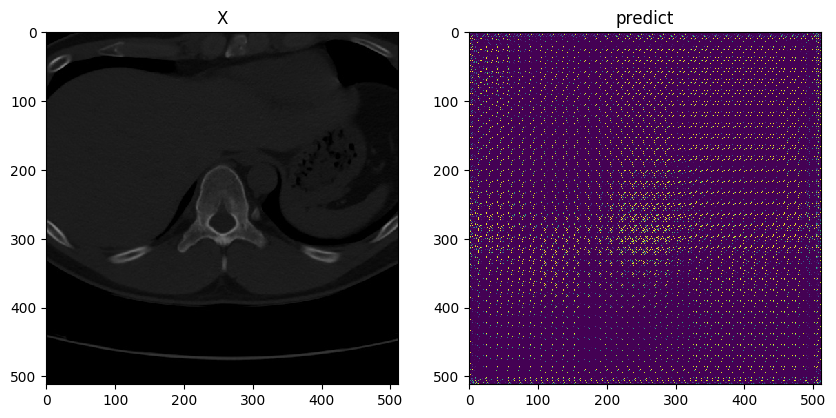

In [54]:
x, x_input = read_img(0)
predict_img = model.predict(x_input)#(1, 262144, 2)

plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.subplot(121), plt.title('X'), plt.imshow(x)
plt.subplot(122), plt.title('predict'), plt.imshow(predict_img.reshape(512, 512, 2)[:, :, 0])
plt.show()

In [23]:
del model